In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Travel.csv')

In [7]:
num_col=[fea for fea in data.columns if (data[fea].dtype !='O' and data[fea].dtype !=int)]
#segregating categorical and numerical variables 
num_col

['Age',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [8]:
cat_col=[fea for fea in data.columns if data[fea].dtype =='O'] #segregating categorical and numerical variables 
cat_col

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

Method 1: Transforming Variables with the Logarithm:

Transforming Variables may improve the performance of Linear and Logistic regression machine learning models

In [51]:
#Using sklearn
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
X=data[num_col]

In [52]:
# Performing Mean Imputation
for var in num_col:
    value=X[var].mean()
    X[var]=X[var].fillna(value)

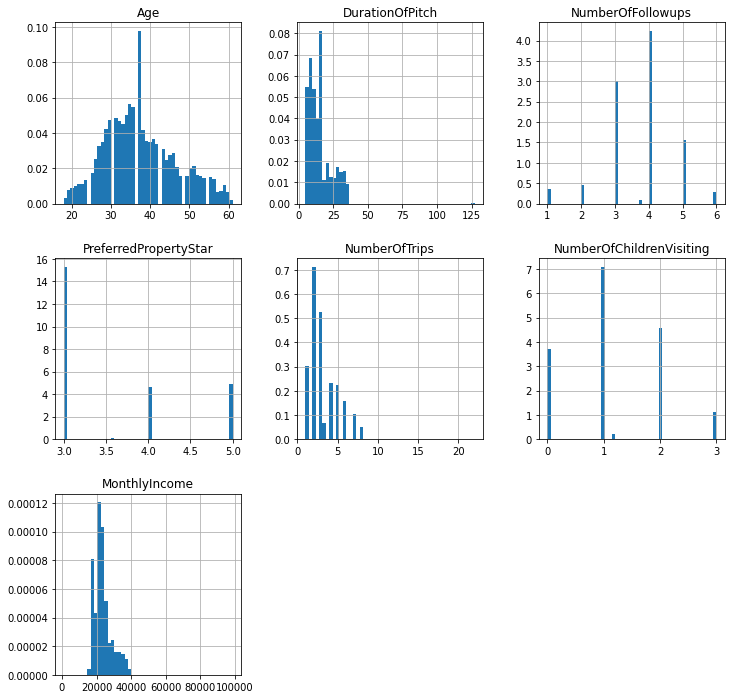

In [53]:
X.hist(bins=50,figsize=(12,12),density=True)
plt.show()

In [54]:

# creating a copy of the orginal dataframe using pandas copy()
X_tf=X.copy()
# Appling log transformation
X_tf=np.log(X_tf)
X_tf

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
0,3.713572,1.791759,1.098612,1.098612,0.000000,-inf,9.951944
1,3.891820,2.639057,1.386294,1.386294,0.693147,0.693147,9.909967
2,3.610918,2.079442,1.386294,1.098612,1.945910,-inf,9.746249
3,3.496508,2.197225,1.098612,1.098612,0.693147,0.000000,9.793059
4,3.627596,2.079442,1.098612,1.386294,0.000000,-inf,9.823795
...,...,...,...,...,...,...,...
4883,3.891820,2.197225,1.609438,1.386294,0.693147,0.000000,10.187764
4884,3.332205,3.433987,1.609438,1.098612,1.098612,0.693147,9.962322
4885,3.951244,2.833213,1.386294,1.386294,1.945910,1.098612,10.367850
4886,2.944439,2.772589,1.386294,1.098612,1.098612,0.693147,9.917834


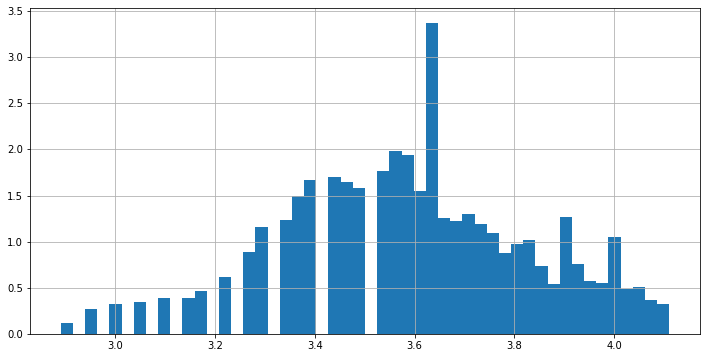

In [55]:
X_tf_1=X_tf['Age']
X_tf_1.hist(bins=50,figsize=(12,6),density=True)
plt.show()

In [56]:
#Using sklearn
transformer=FunctionTransformer(np.log)

In [57]:
data_tf=transformer.transform(X_tf)

In [58]:
data_tf=pd.DataFrame(data_tf)

In [59]:
data_tf

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
0,1.311994,0.583198,0.094048,0.094048,-inf,NaN,2.297768
1,1.358877,0.970422,0.326634,0.326634,-0.366513,-0.366513,2.293541
2,1.283962,0.732099,0.326634,0.094048,0.665730,NaN,2.276882
3,1.251765,0.787195,0.094048,0.094048,-0.366513,-inf,2.281674
4,1.288570,0.732099,0.094048,0.326634,-inf,NaN,2.284807
...,...,...,...,...,...,...,...
4883,1.358877,0.787195,0.475885,0.326634,-0.366513,-inf,2.321187
4884,1.203634,1.233722,0.475885,0.094048,0.094048,-0.366513,2.298810
4885,1.374030,1.041412,0.326634,0.326634,0.665730,0.094048,2.338710
4886,1.079918,1.019781,0.326634,0.094048,0.094048,-0.366513,2.294335


Method 2: Transforming variables with reciprocal function

In [63]:
# Using Numpy
X_input=X['Age']
np.reciprocal(X_input)

0       0.024390
1       0.020408
2       0.027027
3       0.030303
4       0.026580
          ...   
4883    0.020408
4884    0.035714
4885    0.019231
4886    0.052632
4887    0.027778
Name: Age, Length: 4888, dtype: float64

In [67]:
X_input=X['Age']
X_input
#Using sklearn
transformer=FunctionTransformer(np.reciprocal)
X_input=transformer.transform(X_input)
X_input

0       0.024390
1       0.020408
2       0.027027
3       0.030303
4       0.026580
          ...   
4883    0.020408
4884    0.035714
4885    0.019231
4886    0.052632
4887    0.027778
Name: Age, Length: 4888, dtype: float64

Method 3: Transforming variables with square root and cube root

In [73]:
#Using numpy
data=pd.read_csv('Travel.csv')
X=data[num_col]
X_tf=np.sqrt(X)
X_tf

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
0,6.403124,2.449490,1.732051,1.732051,1.000000,0.000000,144.889613
1,7.000000,3.741657,2.000000,2.000000,1.414214,1.414214,141.880231
2,6.082763,2.828427,2.000000,1.732051,2.645751,0.000000,130.728727
3,5.744563,3.000000,1.732051,1.732051,1.414214,1.000000,133.824512
4,NaN,2.828427,1.732051,2.000000,1.000000,0.000000,135.897020
...,...,...,...,...,...,...,...
4883,7.000000,3.000000,2.236068,2.000000,1.414214,1.000000,163.021471
4884,5.291503,5.567764,2.236068,1.732051,1.732051,1.414214,145.643400
4885,7.211103,4.123106,2.000000,2.000000,2.645751,1.732051,178.381613
4886,4.358899,4.000000,2.000000,1.732051,1.732051,1.414214,142.439461


In [74]:
#using sklearn
data=pd.read_csv('Travel.csv')
X=data[num_col]
transformer=FunctionTransformer(np.sqrt)
X=transformer.transform(X)
X

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
0,6.403124,2.449490,1.732051,1.732051,1.000000,0.000000,144.889613
1,7.000000,3.741657,2.000000,2.000000,1.414214,1.414214,141.880231
2,6.082763,2.828427,2.000000,1.732051,2.645751,0.000000,130.728727
3,5.744563,3.000000,1.732051,1.732051,1.414214,1.000000,133.824512
4,NaN,2.828427,1.732051,2.000000,1.000000,0.000000,135.897020
...,...,...,...,...,...,...,...
4883,7.000000,3.000000,2.236068,2.000000,1.414214,1.000000,163.021471
4884,5.291503,5.567764,2.236068,1.732051,1.732051,1.414214,145.643400
4885,7.211103,4.123106,2.000000,2.000000,2.645751,1.732051,178.381613
4886,4.358899,4.000000,2.000000,1.732051,1.732051,1.414214,142.439461


Method 4: Transforming variables with power transformations

In [76]:
#using sklearn
data=pd.read_csv('Travel.csv')
X=data[num_col]
transformer=FunctionTransformer(lambda x: np.power(x,0.3))
X=transformer.transform(X)
X

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
0,3.046738,1.711770,1.390389,1.390389,1.000000,0.000000,19.798047
1,3.214096,2.207183,1.515717,1.515717,1.231144,1.231144,19.550287
2,2.954340,1.866066,1.515717,1.390389,1.792790,0.000000,18.613267
3,2.854659,1.933182,1.390389,1.390389,1.231144,1.000000,18.876497
4,NaN,1.866066,1.390389,1.515717,1.000000,0.000000,19.051359
...,...,...,...,...,...,...,...
4883,3.214096,1.933182,1.620657,1.515717,1.231144,1.000000,21.249410
4884,2.717361,2.801615,1.620657,1.390389,1.390389,1.231144,19.859782
4885,3.271907,2.339563,1.515717,1.515717,1.792790,1.390389,22.429007
4886,2.418945,2.297397,1.515717,1.390389,1.390389,1.231144,19.596486


Method 5: Transforming Numerical variables with Box-Cox transformations

In [99]:
#defined by (X**(lambda)-1)/X
#lambda is transformation parameter and X is the variable
data=pd.read_csv('Travel.csv')
X=data[num_col]
# Performing Mean Imputation
for var in num_col:
    value=X[var].mean()
    X[var]=X[var].fillna(value) 
X_in=X['Age'].array.reshape(-1, 1)
from sklearn.preprocessing import PowerTransformer
#using sklearn
transformer=PowerTransformer(method='box-cox',standardize=False)
transformer.fit(X_in)
X_1=transformer.transform(X_in)
#X_in

Method 6: Transforming Numerical variables with Yeo-Johnson transformation

In [102]:
data=pd.read_csv('Travel.csv')
X=data[num_col]
# Performing Mean Imputation
for var in num_col:
    value=X[var].mean()
    X[var]=X[var].fillna(value) 
X_in=X['Age'].array.reshape(-1, 1)
from sklearn.preprocessing import PowerTransformer
#using sklearn
transformer=PowerTransformer(method='yeo-johnson',standardize=False)
transformer.fit(X_in)
X_1=transformer.transform(X_in)

#X_in